# World Happiness Score Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Importing the data

In [3]:
world = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [4]:
world

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
world.shape

(158, 12)

Observations:
1) So our data has total 158 number of rows and 12 number of columns.

2) Out of 12 columns in the data 11 are independent variables and 1 is dependent (target variable).

3) Happiness score is our target variable in this data set.

In [6]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Observation:
    
1) The above table shows that there are total 3 types of data in the dataset.

2) In 3 types of data maximum number of columns (9) are having float64 data typed followed by object with 2 and integer with 1.

3) The table also shows that there are no null values in this data set, which is a good thing for processing the data.

In [7]:
world.set_index('Happiness Rank', inplace = True)

In [8]:
world

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


From above data it can be seen that we have changed our index with Happines rank.

In [9]:
world.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:

1) It can be seen that all the columns in the set are having same number of rows & no any column is having negative values which suggests that the data set is good.

2) The standard deviation for the column Happiness score - our target variable is a little bit higher then one rest all columns are having the standard deviation less then one.

3) The mean & the median for all the columns are nearly matched which suggest less skewness in the data.

4) The difference between the 75% and the maximum value of all columns is also not at higher side which suggests less outliers in the data. Still we will check all this things through graphical analysis also.

In [10]:
world.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Again confirmed that there are no null values in this data set.

In [11]:
world.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_6952\3307878357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  world.skew()


Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

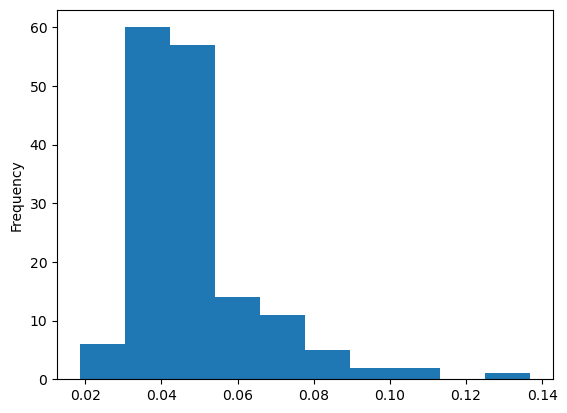

In [12]:
world['Standard Error'].plot.hist()

From the above graph it can be seen that the data is skewed from left to right. Hence we will try to remove the skewness.

In [13]:
world['Standard Error'] = np.log(world['Standard Error'])

In [14]:
world['Standard Error'].skew()

0.48462318471794924

<AxesSubplot:ylabel='Frequency'>

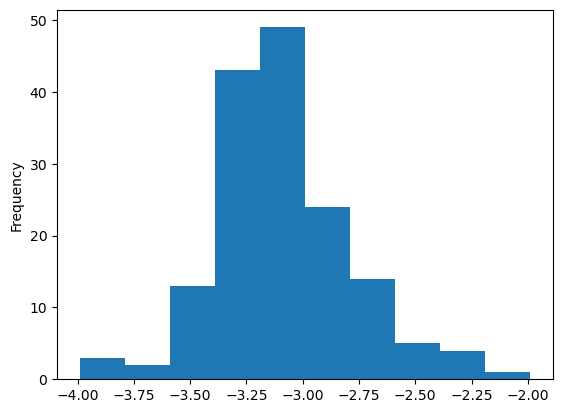

In [15]:
world['Standard Error'].plot.hist()

Now it can be seen that the graph represents the data like a bell shaped curve.

In [16]:
world.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_6952\3307878357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  world.skew()


Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

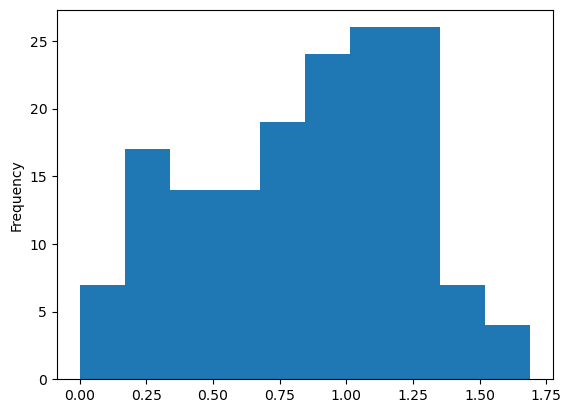

In [17]:
world['Economy (GDP per Capita)'].plot.hist()

From above graph it is seen that data is mostly equally distibuted and the skewness for the column is also in satisfactory limit hence we are not trying to remove the skewness for this column.

<AxesSubplot:ylabel='Frequency'>

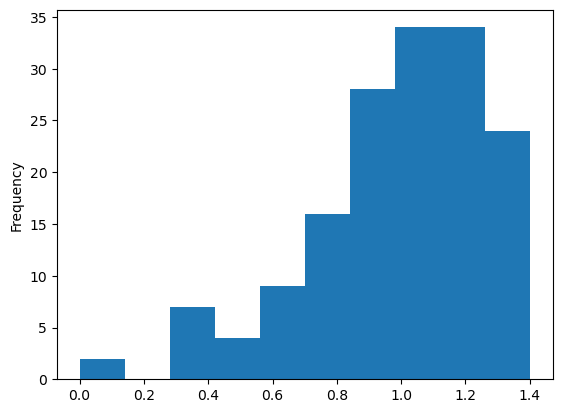

In [18]:
world['Family'].plot.hist()

The above graph shows that the graph is skewed right to left, hence we will remove the skewness and try to qualize the data.

In [19]:
from scipy.stats import boxcox

Remarks:
    
We have tried removing skewness for this column in several ways but no any of the approach is getting fit properly and removing skewness rather it is either increasing the skewness or making the data Nan. Hence we will not remove the skewness and the column will remain as it is.

In [20]:
world.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_6952\3307878357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  world.skew()


Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

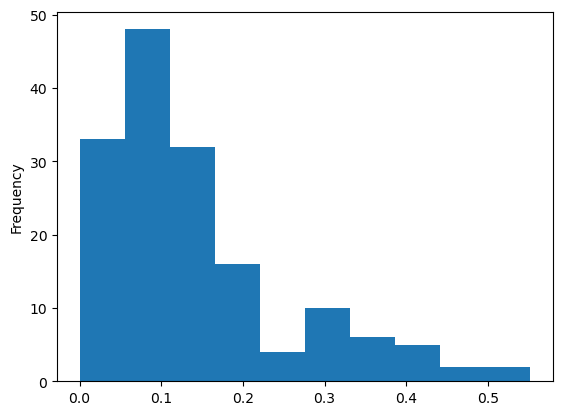

In [21]:
world['Trust (Government Corruption)'].plot.hist()

The above graph shows that the data in the column is skewed from left to right, we will go ahead and try removing skeness.

In [22]:
world['Trust (Government Corruption)'] = np.sqrt(world['Trust (Government Corruption)'])

In [23]:
world['Trust (Government Corruption)'].skew()

0.5076631719436373

<AxesSubplot:ylabel='Frequency'>

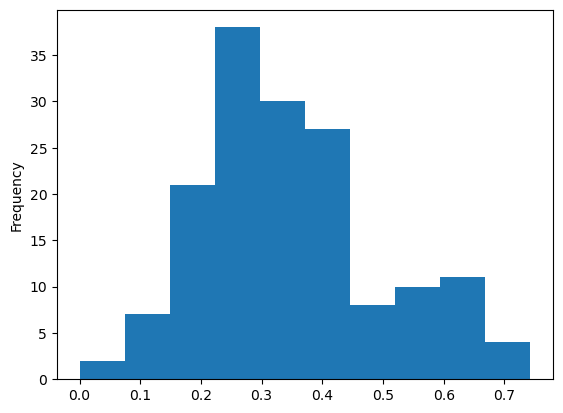

In [24]:
world['Trust (Government Corruption)'].plot.hist()

The above graph shows that the skewness for the column is removed and the data is now normally distrubuted.

In [25]:
world.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_6952\3307878357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  world.skew()


Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

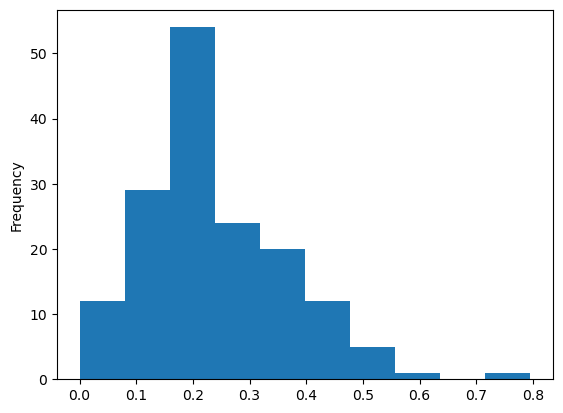

In [26]:
world['Generosity'].plot.hist()

In [27]:
world['Generosity'] = np.sqrt(world['Generosity'])

In [28]:
world['Generosity'].skew()

-0.13096114407238366

<AxesSubplot:ylabel='Frequency'>

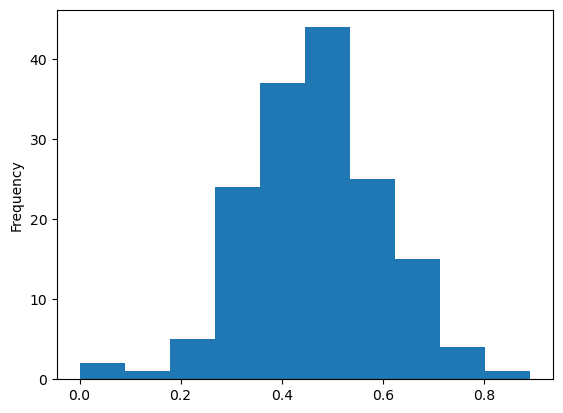

In [29]:
world['Generosity'].plot.hist()

The above shows that the skewness is removed for the column and now the data is distrubuted like bell shaped curve.

In [30]:
world.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_6952\3307878357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  world.skew()


Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

Now, as we have worked on the skewness of the columns whose skewness were on higher side we will check the outliers in the columns.

Happiness Score                      AxesSubplot(0.125,0.77;0.227941x0.11)
Standard Error                    AxesSubplot(0.398529,0.77;0.227941x0.11)
Economy (GDP per Capita)          AxesSubplot(0.672059,0.77;0.227941x0.11)
Family                              AxesSubplot(0.125,0.638;0.227941x0.11)
Health (Life Expectancy)         AxesSubplot(0.398529,0.638;0.227941x0.11)
Freedom                          AxesSubplot(0.672059,0.638;0.227941x0.11)
Trust (Government Corruption)       AxesSubplot(0.125,0.506;0.227941x0.11)
Generosity                       AxesSubplot(0.398529,0.506;0.227941x0.11)
Dystopia Residual                AxesSubplot(0.672059,0.506;0.227941x0.11)
dtype: object

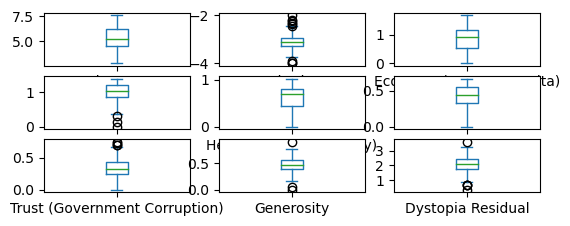

In [31]:
world.plot(kind = 'box', subplots = True, layout = (6,3))

<AxesSubplot:>

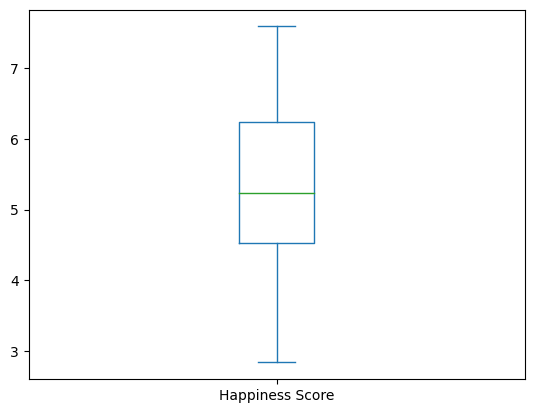

In [32]:
world['Happiness Score'].plot.box()

<AxesSubplot:>

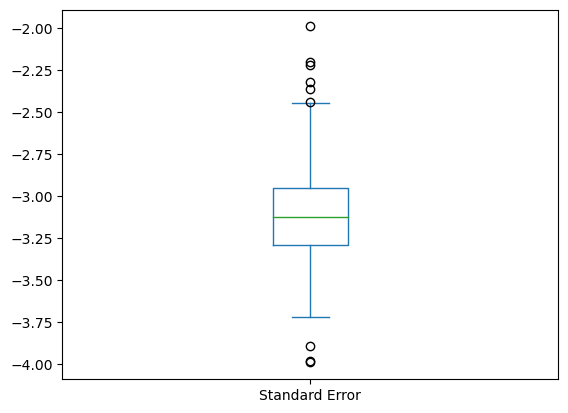

In [33]:
world['Standard Error'].plot.box()

The above plot shows that the column Standard error is having the outliers in it.

<AxesSubplot:>

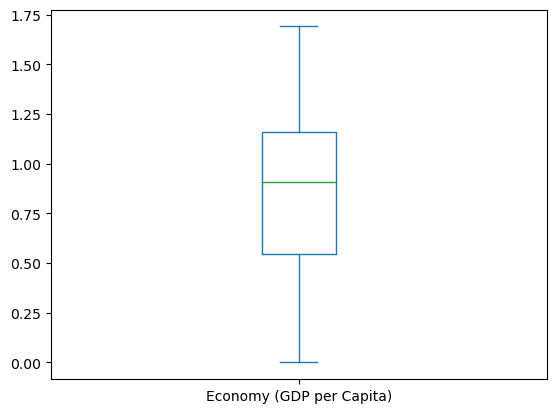

In [34]:
world['Economy (GDP per Capita)'].plot.box()

No outliers in this column

<AxesSubplot:>

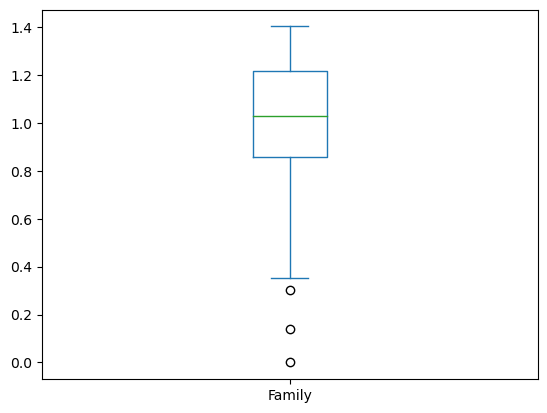

In [35]:
world['Family'].plot.box()

Above plot shows that there are few outliers in this columns.

<AxesSubplot:>

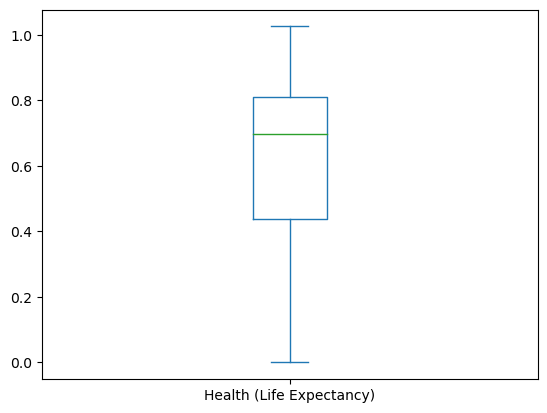

In [36]:
world['Health (Life Expectancy)'].plot.box()

No outliers in this column.

<AxesSubplot:>

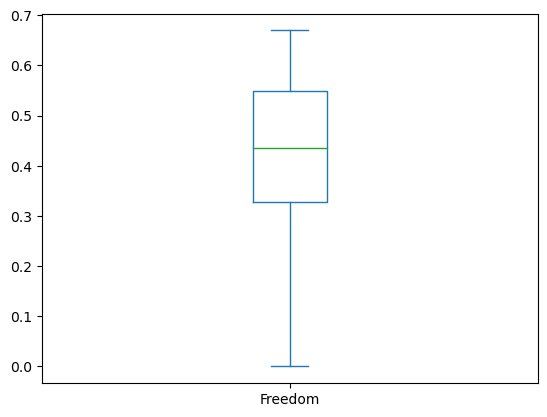

In [37]:
world['Freedom'].plot.box()

No outliers in this column

<AxesSubplot:>

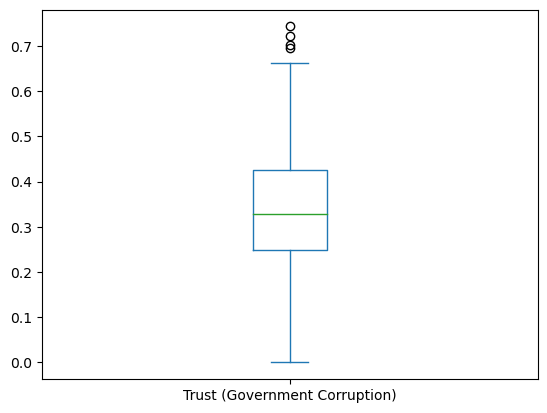

In [38]:
world['Trust (Government Corruption)'].plot.box()

Some outliers can be seen in this column.

<AxesSubplot:>

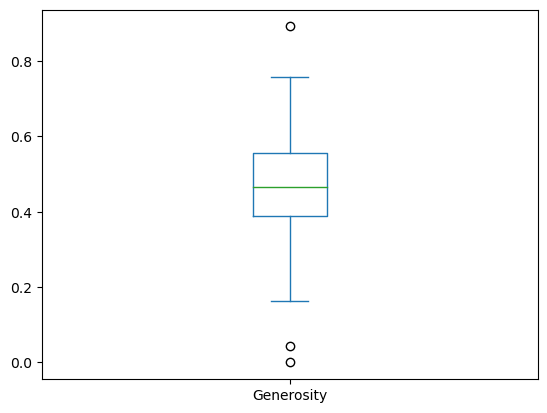

In [39]:
world['Generosity'].plot.box()

Outliers can be seen in this column.

<AxesSubplot:>

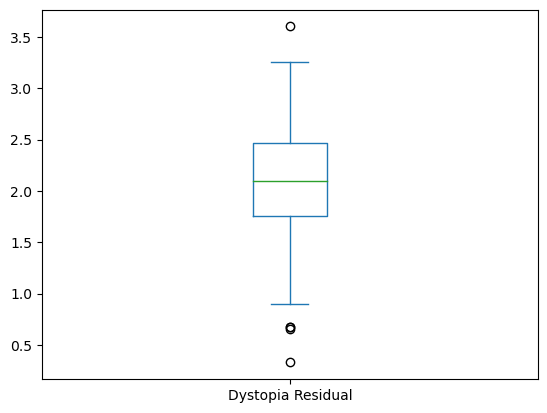

In [40]:
world['Dystopia Residual'].plot.box()

Outliers found in this column as well.

As outliers are seen in nearly half of the columns we will go ahead and try to remove ouliers from the data set.

In [44]:
world.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

The happiness score depends on the independent variables such as standard error, economy,family, health, freedom, trust, generosity, dystopia residual. Hence we are currently making another dataframre by dropping the two columns of country name and region as they do not affect the happiness score directly.

In [45]:
world1 = pd.DataFrame(world)

In [48]:
world1.drop(['Country','Region'],axis =1, inplace = True)

In [49]:
world1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.647904,0.544775,2.51738
2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.376098,0.660530,2.70201
3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.695392,0.584286,2.49204
4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.604177,0.589059,2.46531
5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...
154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.742906,0.475689,0.67042
155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.283019,0.427317,1.63328
156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.434810,0.686870,0.32858


In [50]:
world1.skew()

Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [51]:
from scipy.stats import zscore

In [52]:
Z = np.abs(zscore(world1))
Z

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,1.937360,0.915376,1.369621,1.320281,1.263408,1.577438,1.994534,0.572055,0.758258
2,1.914581,0.229364,1.135226,1.514458,1.289434,1.332456,0.190088,1.440806,1.092857
3,1.884792,0.993935,1.192861,1.361054,0.992229,1.469659,2.309792,0.868586,0.712335
4,1.880411,0.504531,1.525130,1.251922,1.035145,1.605131,1.704241,0.904406,0.663893
5,1.797179,0.785305,1.194876,1.221204,1.118054,1.360416,1.504447,1.563200,0.639337
...,...,...,...,...,...,...,...,...,...
154,1.674055,0.866206,1.552987,0.800520,0.818610,1.087740,2.625227,0.053557,2.588925
155,1.783571,0.694170,1.392303,2.346860,1.263362,0.372033,0.427838,0.309478,0.843967
156,2.076199,0.313775,0.455245,1.901086,0.372199,1.809238,0.579860,1.638487,3.208430


In [53]:
threshold = 3
print(np.where(Z>3))

(array([ 63,  64, 101, 128, 147, 155, 157], dtype=int64), array([7, 1, 7, 7, 3, 8, 3], dtype=int64))


In [55]:
world2 = world1[(Z<3).all(axis =1)]
world2

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,
1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.647904,0.544775,2.51738
2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.376098,0.660530,2.70201
3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.695392,0.584286,2.49204
4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.604177,0.589059,2.46531
5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...
152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.358218,0.466337,1.46494
153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.311753,0.604235,1.95210
154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.742906,0.475689,0.67042


So we have removed the outliers through Zscore method and it can be seen that some of the columns are removed in our new data frame. But the no. of columns which are removed are less which is good thing.

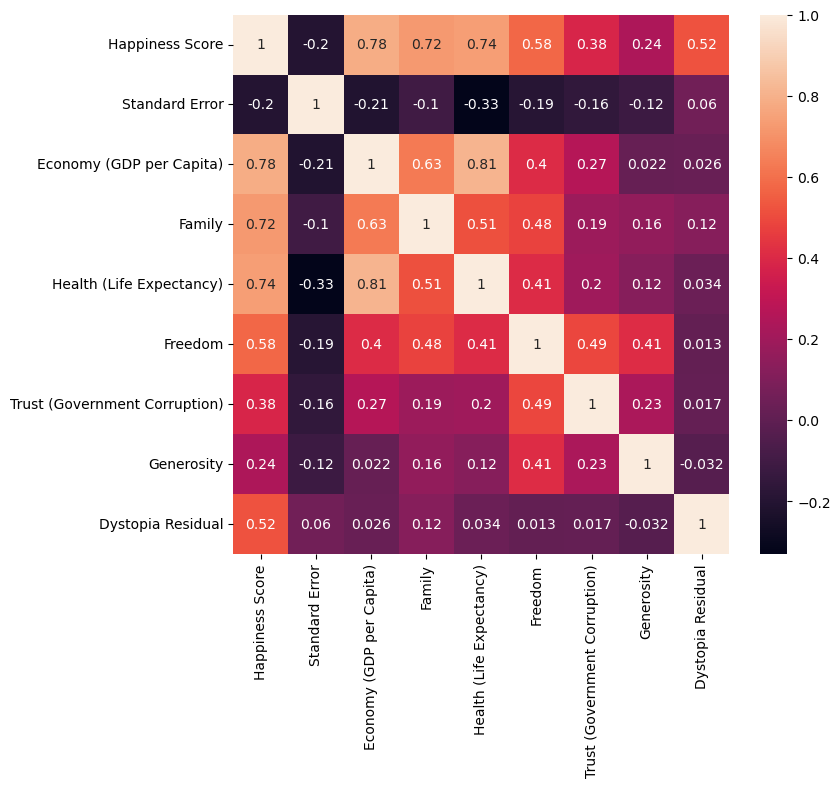

In [57]:
plt.figure(figsize = (8,7))
sns.heatmap(world2.corr(), annot = True)
plt.show()

Through the above heatmap it can be seen that the coulumn Standard is having negative correlation with our target variable. We will check the same through graphical analysis.

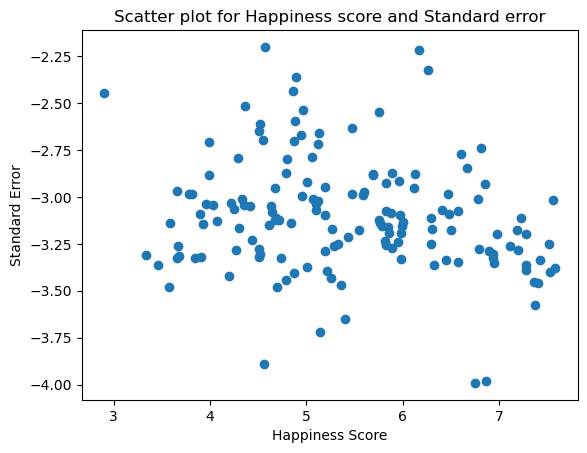

In [58]:
plt.scatter(world2['Happiness Score'], world2['Standard Error'])
plt.title('Scatter plot for Happiness score and Standard error')
plt.xlabel('Happiness Score')
plt.ylabel('Standard Error')
plt.show()

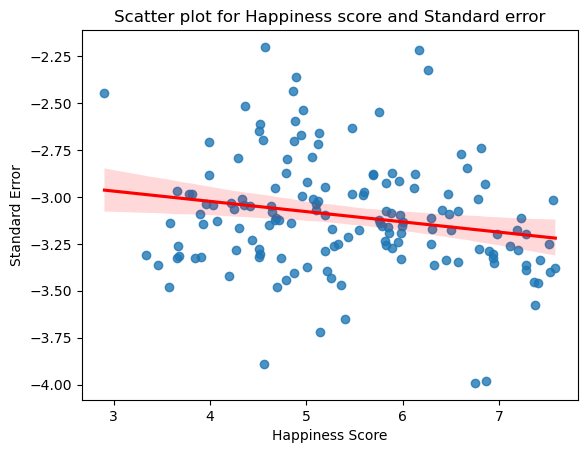

In [60]:
sns.regplot(x = 'Happiness Score', y = 'Standard Error', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Standard error')
plt.xlabel('Happiness Score')
plt.ylabel('Standard Error')
plt.show()

It can be seen that Standard error is negatively correlated with Happiness Score.

In [63]:
world2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                151 non-null    float64
 1   Standard Error                 151 non-null    float64
 2   Economy (GDP per Capita)       151 non-null    float64
 3   Family                         151 non-null    float64
 4   Health (Life Expectancy)       151 non-null    float64
 5   Freedom                        151 non-null    float64
 6   Trust (Government Corruption)  151 non-null    float64
 7   Generosity                     151 non-null    float64
 8   Dystopia Residual              151 non-null    float64
dtypes: float64(9)
memory usage: 11.8 KB


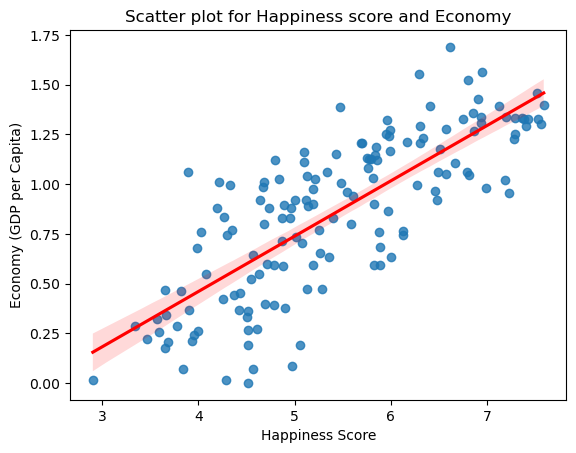

In [65]:
sns.regplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Economy')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

The Economy column is highly positively correlated with Happiness score.

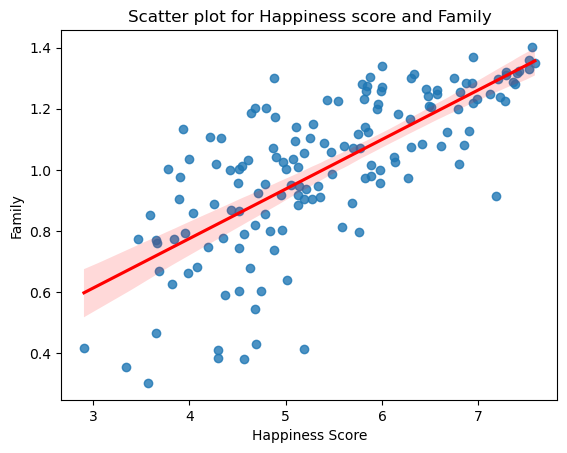

In [67]:
sns.regplot(x = 'Happiness Score', y = 'Family', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.show()

Column Family is also Highly positively correlated with Happiness score.

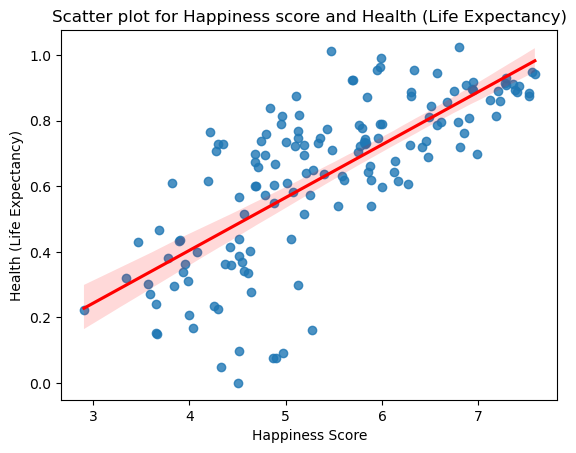

In [68]:
sns.regplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Health (Life Expectancy)')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.show()

Health is also Highly positively correlated with Happiness score.

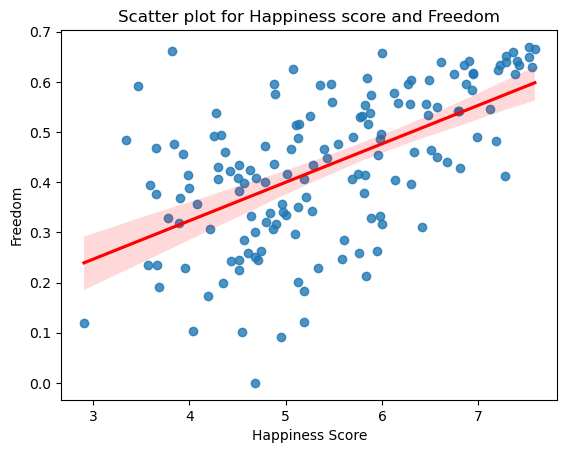

In [69]:
sns.regplot(x = 'Happiness Score', y = 'Freedom', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

Freedom is also positively correlated with Happiness score.

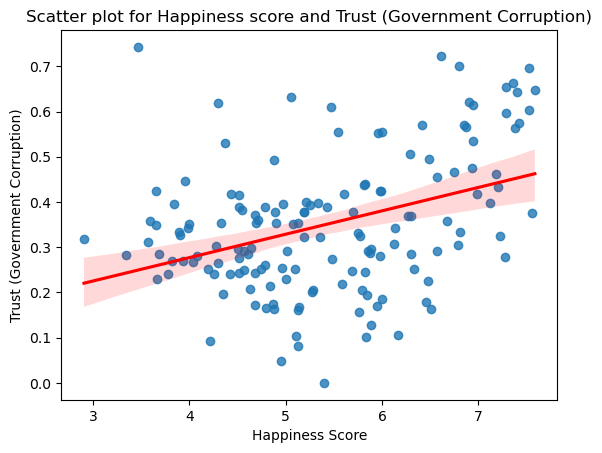

In [70]:
sns.regplot(x = 'Happiness Score', y = 'Trust (Government Corruption)', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Trust (Government Corruption)')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.show()

The trust column is not having much positive correlation with Happiness score.

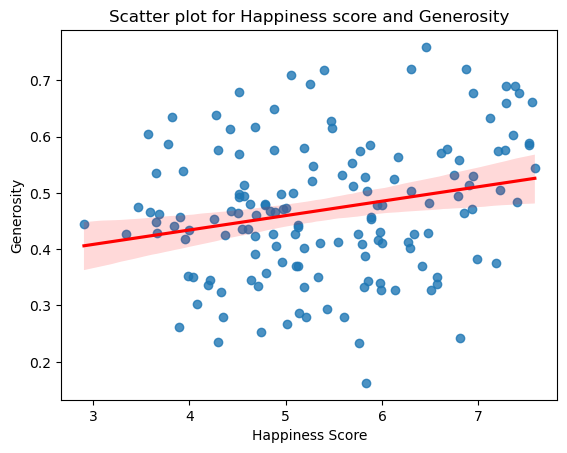

In [72]:
sns.regplot(x = 'Happiness Score', y = 'Generosity', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.show()

The generosity is not so positively correlated with Happiness score.

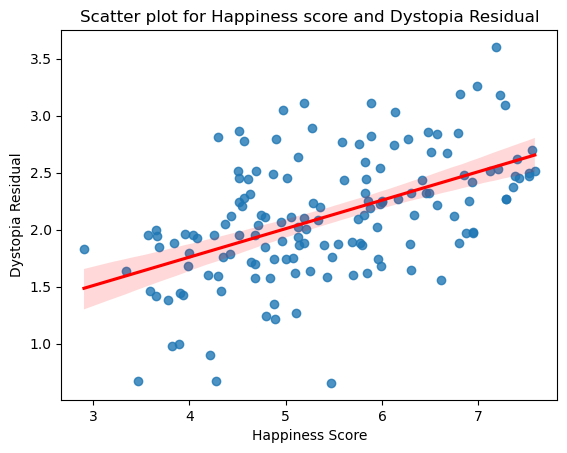

In [73]:
sns.regplot(x = 'Happiness Score', y = 'Dystopia Residual', data = world2, line_kws={'color': 'red'})
plt.title('Scatter plot for Happiness score and Dystopia Residual')
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
plt.show()

So Dystopia Residual is positevly correlated with Happiness Score.

In [74]:
x = world2.iloc[:,1:]
y = world2.iloc[:,0]

In [75]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,-3.378165,1.39651,1.34951,0.94143,0.66557,0.647904,0.544775,2.51738
2,-3.019206,1.30232,1.40223,0.94784,0.62877,0.376098,0.660530,2.70201
3,-3.402799,1.32548,1.36058,0.87464,0.64938,0.695392,0.584286,2.49204
4,-3.249335,1.45900,1.33095,0.88521,0.66973,0.604177,0.589059,2.46531
5,-3.337378,1.32629,1.32261,0.90563,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...
152,-3.140989,0.25812,0.85188,0.27125,0.39493,0.358218,0.466337,1.46494
153,-3.478943,0.31982,0.30285,0.30335,0.23414,0.311753,0.604235,1.95210
154,-3.362746,0.22208,0.77370,0.42864,0.59201,0.742906,0.475689,0.67042


In [76]:
y

Happiness Rank
1      7.587
2      7.561
3      7.527
4      7.522
5      7.427
       ...  
152    3.587
153    3.575
154    3.465
155    3.340
157    2.905
Name: Happiness Score, Length: 151, dtype: float64

In [77]:
x.shape

(151, 8)

In [78]:
y.shape

(151,)

We have now separated the target variable and the independent variable in x and y. The x is containing our dependent variables and y is containing the target variable.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.911513,1.355193,1.370643,1.254591,1.564600,1.967720,0.618736,0.750467
1,0.271585,1.118716,1.581160,1.280780,1.317456,0.167593,1.583430,1.093920
2,-0.992705,1.176863,1.414847,0.981720,1.455870,2.282223,0.948016,0.703329
3,-0.486902,1.512083,1.296531,1.024904,1.592539,1.678121,0.987791,0.653605
4,-0.777084,1.178896,1.263229,1.108330,1.345662,1.478806,1.719341,0.628399
...,...,...,...,...,...,...,...,...
146,-0.129804,-1.502891,-0.616444,-1.483436,-0.252989,0.049173,-0.034964,-1.207310
147,-1.243669,-1.347985,-2.808777,-1.352291,-1.332838,-0.258555,1.114271,-0.301082
148,-0.860695,-1.593374,-0.928625,-0.840417,1.070579,2.596903,0.042976,-2.685297
149,-0.682895,-1.431262,-2.605089,-1.287944,0.348554,-0.448854,-0.360151,-0.894160


We scaled our independent varaibles to regularize them so that our model can learn from them more.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features'] = x1.columns

In [85]:
vif

,Values,features
0,1.162325,Standard Error
1,3.938202,Economy (GDP per Capita)
2,1.931706,Family
3,3.336188,Health (Life Expectancy)
4,1.926057,Freedom
5,1.383478,Trust (Government Corruption)
6,1.276191,Generosity
7,1.029922,Dystopia Residual


For the columns the variance inflation factor seems to be in normal limit, hence we are not droping any of the column.

Now as we are ready with our independent variables and target variable we will be searching for the best random state for our Machine learning model.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
maxacc =0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxacc:
        maxacc = acc
        maxrs =i

print('The best accuracy is', maxacc,'at the random state', maxrs)

The best accuracy is 0.9995549966318918 at the random state 24


So the best random score for this data will be 24. Now we will be going ahead and implementing the different algorithms on data.

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.30,random_state = maxrs)

In [112]:
lr.fit(x_train,y_train)
lrpred = lr.predict(x_test)
r2_lr = r2_score(y_test,lrpred)
MSE_lr = mean_squared_error(y_test,lrpred)
MAE_lr = mean_absolute_error(y_test,lrpred)

print('The score for Liner Regression is', r2_lr.round(2))
print('The mean squared error for linear regression is',MSE_lr.round(2))
print('The mean absolute error for linear regression is', MAE_lr.round(2))

The score for Liner Regression is 1.0
The mean squared error for linear regression is 0.0
The mean absolute error for linear regression is 0.02


In [93]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred = dtr.predict(x_test)
r2_dtr = r2_score(y_test,dtrpred)
MSE_dtr = mean_squared_error(y_test,dtrpred)
MAE_dtr = mean_absolute_error(y_test,dtrpred)

print('The score for Decision Tree Regressor is ', r2_dtr.round(2))
print('The Mean Squared Error for Decision Tree Regressor is', MSE_dtr.round(2))
print('The Mean Absolute Error for Decision Tree Regressor is', MAE_dtr.round(2))

The score for Decision Tree Regressor is  0.82
The Mean Squared Error for Decision Tree Regressor is 0.25
The Mean Absolute Error for Decision Tree Regressor is 0.42


In [95]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfrpred = rfr.predict(x_test)
r2_rfr = r2_score(y_test, rfrpred)
MSE_rfr = mean_squared_error(y_test, rfrpred)
MAE_rfr = mean_absolute_error(y_test, rfrpred)

print('The score for Random Forest Regressor is', r2_rfr.round(2))
print('The Mean Squared Error for Random Forest Regressor is', MSE_rfr.round(2))
print('The Mean Absolute Error for Random Forest Regressor is', MAE_rfr.round(2))

The score for Random Forest Regressor is 0.89
The Mean Squared Error for Random Forest Regressor is 0.14
The Mean Absolute Error for Random Forest Regressor is 0.29


In [96]:
svr = SVR()
svr.fit(x_train, y_train)
svrpred = svr.predict(x_test)
r2_svr = r2_score(y_test,svrpred)
MSE_svr = mean_squared_error(y_test,svrpred)
MAE_svr = mean_absolute_error(y_test, svrpred)

print('The score for Support Vector Regressor is', r2_svr.round(2))
print('The Mean Squared Error for Support Vector Regressor is', MSE_svr.round(2))
print('The Mean Absolute Error for Support Vector Regressor is', MAE_svr.round(2))

The score for Support Vector Regressor is 0.95
The Mean Squared Error for Support Vector Regressor is 0.07
The Mean Absolute Error for Support Vector Regressor is 0.18


In [97]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
knrpred = knr.predict(x_test)
r2_knr = r2_score(y_test,knrpred)
MSE_knr = mean_squared_error(y_test, knrpred)
MAE_knr = mean_absolute_error(y_test, knrpred)

print('The Score for KNeighbors Regressor is', r2_knr.round(2))
print('The Mean Squared Error for KNeighbors Regressor is', MSE_knr.round(2))
print('The Mean Absolute Error for KNeighbors Regressor is', MAE_knr.round(2))

The Score for KNeighbors Regressor is 0.9
The Mean Squared Error for KNeighbors Regressor is 0.13
The Mean Absolute Error for KNeighbors Regressor is 0.29


In [98]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpred = gbr.predict(x_test)
r2_gbr = r2_score(y_test,gbrpred)
MSE_gbr = mean_squared_error(y_test,gbrpred)
MAE_gbr = mean_absolute_error(y_test,gbrpred)

print('The Score for Gradient Boosing Regressor is', r2_gbr.round(2))
print('The Mean Squared Error for Gradient Boosing Regressor is', MSE_gbr.round(2))
print('The Mean Absolute Error for Gradient Boosing Regressor is', MAE_gbr.round(2))

The Score for Gradient Boosing Regressor is 0.94
The Mean Squared Error for Gradient Boosing Regressor is 0.07
The Mean Absolute Error for Gradient Boosing Regressor is 0.22


In [101]:
la = Lasso()
la.fit(x_train,y_train)
lapred = la.predict(x_test)
r2_la = r2_score(y_test,lapred)
MSE_la = mean_squared_error(y_test,lapred)
MAE_la = mean_absolute_error(y_test,lapred)

print('The Score for Lasso is', r2_la.round(2))
print('The Mean Squared Error for Lasso is', MSE_la.round(2))
print('The Mean Absolute Error for Lasso is', MAE_la.round(2))

The Score for Lasso is -0.0
The Mean Squared Error for Lasso is 1.34
The Mean Absolute Error for Lasso is 1.01


In [103]:
ri = Ridge()
ri.fit(x_train,y_train)
ripred = ri.predict(x_test)
r2_ri = r2_score(y_test, ripred)
MSE_ri = mean_squared_error(y_test, ripred)
MAE_ri = mean_absolute_error(y_test, ripred)

print('The score for Ridge is', r2_ri.round(2))
print('The Mean Squared Error for Ridge is', MSE_ri.round(2))
print('The Mean Absolute Error for Ridge is', MAE_ri.round(2))

The score for Ridge is 1.0
The Mean Squared Error for Ridge is 0.0
The Mean Absolute Error for Ridge is 0.02


In [104]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etrpred = etr.predict(x_test)
r2_etr = r2_score(y_test, etrpred)
MSE_etr = mean_squared_error(y_test, etrpred)
MAE_etr = mean_absolute_error(y_test, etrpred)

print('The Score for Extra Trees Regressor is', r2_etr.round(2))
print('The Mean Squared Error for Extra Trees Regressor is', MSE_etr.round(2))
print('The Mean Absolute Error for Extra Trees Regressor is', MAE_etr.round(2))

The Score for Extra Trees Regressor is 0.93
The Mean Squared Error for Extra Trees Regressor is 0.09
The Mean Absolute Error for Extra Trees Regressor is 0.22


In [108]:
print('So after implementing the differnt models to data the model with best accuracy and least error is Linear Regression with', (r2_lr*100).round(2),'%.') 

So after implementing the differnt models to data the model with best accuracy and least error is Linear Regression with 99.96 %.


In [116]:
from sklearn.model_selection import cross_val_score

In [118]:
score = cross_val_score(lr,x1,y)
print(score)
print(score.mean())
print(r2_lr)
print('The difference between r2 score and cross val score of linear regression is', (r2_lr - score.mean())*100)

[0.97788739 0.97123441 0.95803686 0.97140072 0.98929392]
0.9735706597311842
0.9995549966318918
The difference between r2 score and cross val score of linear regression is 2.598433690070767


In [119]:
score1 = cross_val_score(ri,x1,y)
print(score1)
print(score1.mean())
print(r2_ri)
print('The difference between r2 score and score val socre of Ridge is', (r2_ri - score1.mean())*100)

[0.96202987 0.97051979 0.95738341 0.96844654 0.99013187]
0.9697022943253343
0.9994738532131444
The difference between r2 score and score val socre of Ridge is 2.9771558887810134


So after seeing the cross val score on our 2 best model, Liner Regression can be finalised as best model to go ahead.

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid ={ 'fit_intercept': [True, False],  
    'normalize': [True, False],     
    'copy_X': [True, False]}

gscv = GridSearchCV(LinearRegression(), param_grid,cv = 5)

In [123]:
gscv.fit(x_train,y_train)

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [124]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [126]:
FM = LinearRegression(copy_X = True,fit_intercept = True, normalize = True )

In [129]:
FM.fit(x_train,y_train)
FMpred = FM.predict(x_test)
FM_score = r2_score(y_test,FMpred)
MSE_FM = mean_squared_error(y_test, FMpred)
MAE_FM = mean_absolute_error(y_test, FMpred)

print('The score for Final Model is', FM_score.round(2))
print('The Mean Squared Error for Final Model is', MSE_FM.round(2))
print('The Mean Absolute Error for Final Model is', MAE_FM.round(2))

The score for Final Model is 1.0
The Mean Squared Error for Final Model is 0.0
The Mean Absolute Error for Final Model is 0.02


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [131]:
import joblib

In [132]:
joblib.dump(FM, 'World Happiness Score')

['World Happiness Score']

In [133]:
Model = joblib.load('World Happiness Score')

In [135]:
predi = Model.predict(x_test)
predi

array([4.67885688, 4.58051778, 5.83186823, 5.80233252, 4.72655144,
       7.25131549, 5.97865123, 5.38741599, 6.57841962, 3.35883699,
       6.47297768, 6.89714393, 6.70424808, 4.62307851, 3.60155262,
       7.15491127, 4.71478064, 6.51322371, 4.73082602, 4.471233  ,
       4.5568401 , 3.8275458 , 3.94837764, 5.85310256, 3.94103042,
       7.57832994, 4.73056134, 3.89807351, 5.96836843, 4.65777857,
       5.22238177, 6.94208103, 5.21689329, 4.97701324, 4.01362635,
       4.60652102, 7.26323346, 5.12426088, 5.8681206 , 5.8319855 ,
       4.92500929, 6.76879427, 6.99869989, 6.85241757, 5.4771734 ,
       3.71038918])

In [136]:
A = np.array(y_test)
df = pd.DataFrame()

df['predicted'] = predi
df['original'] = A

df

,predicted,original
0,4.678857,4.681
1,4.580518,4.550
2,5.831868,5.824
3,5.802333,5.791
4,4.726551,4.694
5,7.251315,7.226
6,5.978651,5.960
7,5.387416,5.360
8,6.578420,6.574
9,3.358837,3.340


Hence it can be seen that the Predicted data and our original data are more than 99% similar.